# Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.285132,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.705810,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.884750,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.626000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
#housing.hist()
#plt.show()

## Train-Test Spliting

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 101


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,100.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.423621,13.643564,10.384554,0.069307,0.555435,6.291470,67.079208,3.848844,9.950495,417.792079,18.569307,357.082277,12.582475,22.446535
std,8.682082,25.670736,6.996552,0.255242,0.114545,0.710899,28.458648,2.290800,9.069042,173.928567,2.288831,88.789557,7.378154,10.003025
min,0.013010,0.000000,0.460000,0.000000,0.400000,4.519000,2.900000,1.129600,1.000000,187.000000,12.600000,10.480000,1.980000,5.600000
25%,0.064660,0.000000,4.000000,0.000000,0.449000,5.870500,38.100000,2.103600,4.000000,273.000000,17.600000,370.780000,6.430000,16.100000
50%,0.245220,0.000000,8.140000,0.000000,0.538000,6.205000,73.500000,3.048000,5.000000,352.000000,19.100000,391.450000,11.120000,20.900000
75%,4.668830,20.000000,18.100000,0.000000,0.647000,6.776000,94.500000,5.100400,24.000000,666.000000,20.200000,395.380000,17.270000,27.500000
max,45.746100,90.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [15]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
#94/7

In [18]:
#376/28

In [19]:
housing = strat_train_set.copy()

## Looking for Correlations

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677824
ZN         0.333316
B          0.329461
DIS        0.226407
CHAS       0.174043
AGE       -0.345445
RAD       -0.359901
CRIM      -0.363524
NOX       -0.406070
TAX       -0.441789
INDUS     -0.446597
PTRATIO   -0.484304
LSTAT     -0.730997
Name: MEDV, dtype: float64

In [22]:
#from pandas.plotting import scatter_matrix
#attributes = ["MEDV", "RM", "ZN", "LSTAT"]
#scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

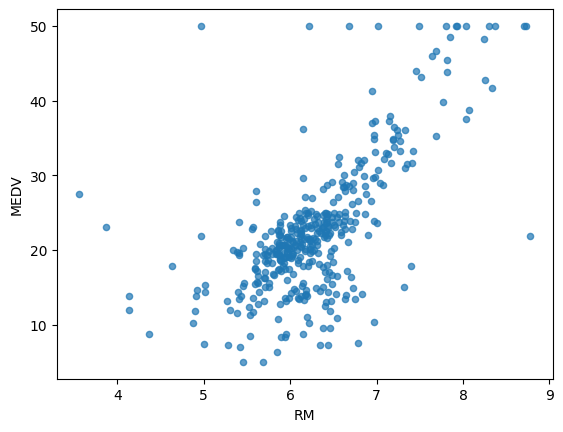

In [23]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.7)

## Trying out Attirbute combination

In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
257,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,383.29,7.79,36.0,36.001636
429,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5,104.914934
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667
214,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277,18.6,393.63,9.47,25.0,44.807506
430,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1,97.468169


In [26]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677824
ZN         0.333316
B          0.329461
DIS        0.226407
CHAS       0.174043
AGE       -0.345445
RAD       -0.359901
CRIM      -0.363524
NOX       -0.406070
TAX       -0.441789
INDUS     -0.446597
PTRATIO   -0.484304
TAXRM     -0.511743
LSTAT     -0.730997
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

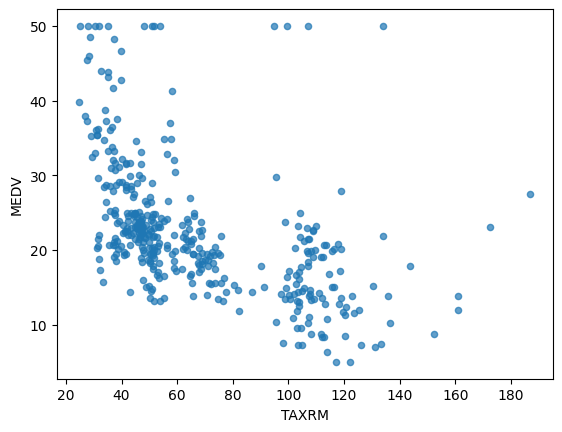

In [27]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.7)

In [28]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

### To take care of missing attributes, you have three options:
###      1. Get rid of the missing data points
###      2. Get rid of the whole attribute
###      3. Set the value to some value(0, mean or median)

In [29]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape

(400, 13)

In [30]:
housing.drop("RM", axis=1).shape #option 2
#the original housing data will remian unchanged

(404, 12)

In [31]:
median = housing["RM"].median() # compute median for option 3
#the original housing data will remian unchanged

In [32]:
median

6.209

In [33]:
housing["RM"].fillna(median) # option 3
#the original housing data will remian unchanged

257    7.333
429    6.348
326    6.083
214    6.182
430    6.833
       ...  
107    6.474
44     5.682
60     5.966
176    6.315
109    6.195
Name: RM, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.419928,10.777228,11.346683,0.069307,0.554551,6.283548,68.957178,3.780862,9.470297,406.126238,18.434901,356.472401,12.689703
std,8.589181,22.722921,6.815452,0.254290,0.116489,0.705418,28.128346,2.062269,8.623737,167.418515,2.131891,92.108469,7.088367
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.084320,0.000000,5.320000,0.000000,0.449000,5.888750,45.675000,2.097050,4.000000,281.000000,17.000000,375.782500,7.250000
50%,0.265035,0.000000,9.795000,0.000000,0.538000,6.209000,78.500000,3.272100,5.000000,330.000000,19.050000,391.385000,11.395000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.604500,93.900000,5.212575,24.000000,666.000000,20.200000,396.285000,16.945000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.65035e-01, 0.00000e+00, 9.79500e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.85000e+01, 3.27210e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91385e+02, 1.13950e+01])

In [38]:
x = imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.419928,10.777228,11.346683,0.069307,0.554551,6.282809,68.957178,3.780862,9.470297,406.126238,18.434901,356.472401,12.689703
std,8.589181,22.722921,6.815452,0.254290,0.116489,0.701948,28.128346,2.062269,8.623737,167.418515,2.131891,92.108469,7.088367
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.084320,0.000000,5.320000,0.000000,0.449000,5.890500,45.675000,2.097050,4.000000,281.000000,17.000000,375.782500,7.250000
50%,0.265035,0.000000,9.795000,0.000000,0.538000,6.209000,78.500000,3.272100,5.000000,330.000000,19.050000,391.385000,11.395000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.595750,93.900000,5.212575,24.000000,666.000000,20.200000,396.285000,16.945000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-Learn Design

Primarily, three types of objets
1. Estimators - It estimate some parameters based on dataset. Eg. Imputer. It has a Fit method and a transform method. Fit method - Fits the dataset and calculate internal parameters
    
2. Transformers -  Transform method takes input and return output based on the learning from fit(). It also has a convenience function called fit-tansform(). Which fits and then transform.
    
3. Predictors - LinearRegrassion model is an example of Predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature-Scaling

Primarily, two types of feature scaling method:
1. Min-Max scaling (Normalization)
   (value-min)/(max-min)
   Sklearn provide a class called MinMaxScaler for this
   
2. Standarization
   (value - mean)/std
   Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # .... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr.shape

(404, 13)

## Selecting a desire Model for Real Estate Predictor

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([35.673, 14.515, 21.72 , 24.997, 14.795])

In [49]:
list(some_labels)

[36.0, 14.5, 22.2, 25.0, 14.1]

## Evaluating the Model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predicitons)
rmse = np.sqrt(mse)

In [51]:
rmse

1.228183027689664

## Using better evaluation technique - Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([2.84340171, 3.94716662, 4.49012689, 3.12600795, 2.82832393,
       4.17850408, 3.86013935, 2.12828895, 2.82113364, 2.19709328])

In [54]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Strandard Deviation: ", scores.std())

In [55]:
print_scores(rmse_scores)

Scores:  [2.84340171 3.94716662 4.49012689 3.12600795 2.82832393 4.17850408
 3.86013935 2.12828895 2.82113364 2.19709328]
Mean:  3.2420186401934243
Strandard Deviation:  0.785301873247596


## Saving the Model

In [67]:
from joblib import dump, load
dump(model, 'Real-Estate.joblib')

['Real-Estate.joblib']

## Testing the Model on test data

In [68]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [69]:
final_mse

8.930223603960389

In [70]:
final_rmse

2.9883479723687447

In [72]:
prepared_data[0]

array([-0.32131535,  0.40638296, -1.08368886, -0.27288841,  0.79461045,
        1.49796484,  1.10498188, -0.91578796, -0.51901395, -0.84998044,
       -2.55249488,  0.29151338, -0.69208859])

## Using the Model

In [73]:
from joblib import dump, load
import numpy as np
model = load('Real-Estate.joblib')
features = np.array([[-0.32131535,  0.40638296, -1.08368886, -0.27288841,  0.79461045,
        9.99796484,  1.10498188, -0.91578796, -0.51901395, -0.84998044,
       -2.55249488,  0.29151338, -0.69208859]])
model.predict(features)

array([46.287])